In [1]:
# https://towardsdatascience.com/how-to-visualize-convolutional-features-in-40-lines-of-code-70b7d87b0030
# https://github.com/bckenstler/CLR

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [175]:
# https://stackoverflow.com/questions/22994423/difference-between-np-random-seed-and-np-random-randomstate
np.random.seed(18)
# np.random.RandomState(18)

In [176]:
import warnings
warnings.filterwarnings(action='once')

In [177]:
import os
import sys
import os.path as path

In [155]:
# # mount gdrive and unzip data
# from google.colab import drive
# drive.mount('/content/gdrive')
# !unzip -q "/content/gdrive/My Drive/All_Datasets/hvc_data.zip"
# # look for `hvc_annotations.csv` file and `resized` dir
# %ls 

In [156]:
os.getcwd()

'D:\\Projects\\PersonAttributesData'

In [178]:
project_dir = '.'
data_dir = path.join(project_dir,'.')
url = path.join(data_dir, 'hvc_annotations.csv')

In [179]:
print(url)
path.exists(url)

.\.\hvc_annotations.csv


True

In [180]:
df = pd.read_csv(url)
df.drop('filename', axis=1, inplace = True)
df.head(2)

,gender,imagequality,age,weight,carryingbag,footwear,emotion,bodypose,image_path
0,male,Average,35-45,normal-healthy,Grocery/Home/Plastic Bag,Normal,Neutral,Front-Frontish,resized/1.jpg
1,female,Average,35-45,over-weight,None,Normal,Angry/Serious,Front-Frontish,resized/2.jpg


In [160]:
df = df[:70]
df.shape

(70, 9)

In [181]:
df.shape

(13573, 9)

In [182]:
# one hot encoding of labels

one_hot_df = pd.concat([
    df[["image_path"]],
    pd.get_dummies(df.gender, prefix="gender"),
    pd.get_dummies(df.imagequality, prefix="imagequality"),
    pd.get_dummies(df.age, prefix="age"),
    pd.get_dummies(df.weight, prefix="weight"),
    pd.get_dummies(df.carryingbag, prefix="carryingbag"),
    pd.get_dummies(df.footwear, prefix="footwear"),
    pd.get_dummies(df.emotion, prefix="emotion"),
    pd.get_dummies(df.bodypose, prefix="bodypose"),
], axis = 1)

one_hot_df.head().T

,0,1,2,3,4
image_path,resized/1.jpg,resized/2.jpg,resized/3.jpg,resized/4.jpg,resized/5.jpg
gender_female,0,1,0,0,1
gender_male,1,0,1,1,0
imagequality_Average,1,1,0,0,0
imagequality_Bad,0,0,0,0,0
imagequality_Good,0,0,1,1,1
age_15-25,0,0,0,0,0
age_25-35,0,0,0,0,0
age_35-45,1,1,0,0,1
age_45-55,0,0,1,1,0


In [183]:
one_hot_df.shape

(13573, 28)

In [164]:
path.abspath(path.join(data_dir,'processed'))

'D:\\Projects\\PersonAttributesData\\processed'

In [165]:
# Custom batch generator
# -------
# Good one -  https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly
# https://towardsdatascience.com/image-augmentation-14a0aafd0498
# https://towardsdatascience.com/writing-custom-keras-generators-fe815d992c5a    
# https://medium.com/the-artificial-impostor/custom-image-augmentation-with-keras-70595b01aeac
# https://towardsdatascience.com/keras-data-generators-and-how-to-use-them-b69129ed779c

# Good one - https://www.kaggle.com/nikhilroxtomar/generators-for-keras-model


In [184]:
import keras
import numpy as np
import cv2
from keras.preprocessing.image import ImageDataGenerator, img_to_array


# Label columns per attribute
_gender_cols_ = [col for col in one_hot_df.columns if col.startswith("gender")]
_imagequality_cols_ = [col for col in one_hot_df.columns if col.startswith("imagequality")]
_age_cols_ = [col for col in one_hot_df.columns if col.startswith("age")]
_weight_cols_ = [col for col in one_hot_df.columns if col.startswith("weight")]
_carryingbag_cols_ = [col for col in one_hot_df.columns if col.startswith("carryingbag")]
_footwear_cols_ = [col for col in one_hot_df.columns if col.startswith("footwear")]
_emotion_cols_ = [col for col in one_hot_df.columns if col.startswith("emotion")]
_bodypose_cols_ = [col for col in one_hot_df.columns if col.startswith("bodypose")]


class PersonDataGenerator(keras.utils.Sequence):
    """
    Ground truth data generator 

    https://www.tensorflow.org/api_docs/python/tf/keras/utils/Sequence
    """
    
    def __init__(self, df, batch_size = 32, input_size = (224, 224), 
                 location = '.', augmentations = None, save_dir = None,
                 shuffle = False):
        self.df = df
        self.image_size = input_size
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.augmentation = augmentations #ImageDataGenerator instance
        self.location = location
        self.save_dir =  save_dir # path.abspath(path.join(self.location,'processed'))
        self.on_epoch_end()

        if self.save_dir:
            self.save_dir = path.abspath(self.save_dir)
            if not path.isdir(self.save_dir):
                os.mkdirs(self.save_dir, exist_ok=True)

    def __len__(self):
        """
        Number of batch in the Sequence.
        """
        return int(np.floor(self.df.shape[0] / self.batch_size))

    
    def __getitem__(self, index):
        """
        Gets batch at position index.
        fetch batched images and targets        
        """
        # slice function - https://www.w3schools.com/python/ref_func_slice.asp
        
        
        batch_slice = slice(index * self.batch_size, (index + 1) * self.batch_size)
        items = self.df.iloc[batch_slice]

        images = np.stack([cv2.imread(path.join(self.location, item["image_path"])) for _, item in items.iterrows()])        
#         if self.augmentation:
#             if self.save_dir:
#                 images = self.augmentation.flow(images, 
#                                             batch_size=self.batch_size, 
#                                             save_to_dir=self.save_dir,
#                                             save_prefix='aug').next()
                    
#             else:
        images = self.augmentation.flow(images, 
                                            batch_size=self.batch_size).next()


        target = {
            "gender_output": items[_gender_cols_].values,
            "image_quality_output": items[_imagequality_cols_].values,
            "age_output": items[_age_cols_].values,
            "weight_output": items[_weight_cols_].values,
            "bag_output": items[_carryingbag_cols_].values,
            "pose_output": items[_bodypose_cols_].values,
            "footwear_output": items[_footwear_cols_].values,
            "emotion_output": items[_emotion_cols_].values,
        }
        
        return images, target

    def on_epoch_end(self):
        """
        Shuffles/sample the df and thereby 
        updates indexes after each epoch
        
        Method called at the end of every epoch.
        
        """
        if self.shuffle == True:
            self.df = self.df.sample(frac=1).reset_index(drop=True)
            # frac --> take sample of the given df, sample size is given as fraction number
            # reset_index drop --> use the drop parameter to avoid the old index being added as a column
            # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html
            

In [185]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(one_hot_df, test_size=0.4, random_state=18)
train_df.shape, val_df.shape

((8143, 28), (5430, 28))

In [186]:
def blur(img):
    return (cv2.blur(img,(5,5)))

def get_random_eraser(input_img, p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    img_h, img_w, img_c = input_img.shape
    p_1 = np.random.rand()

    if p_1 > p:
        return input_img

    while True:
        s = np.random.uniform(s_l, s_h) * img_h * img_w
        r = np.random.uniform(r_1, r_2)
        w = int(np.sqrt(s / r))
        h = int(np.sqrt(s * r))
        left = np.random.randint(0, img_w)
        top = np.random.randint(0, img_h)

        if left + w <= img_w and top + h <= img_h:
            break

    if pixel_level:
        c = np.random.uniform(v_l, v_h, (h, w, img_c))
    else:
        c = np.random.uniform(v_l, v_h)

    input_img[top:top + h, left:left + w, :] = c

    return input_img
    

def blur_cutout(img):
    img =blur(img)
    img = get_random_eraser(img)
    return img

train_aug = ImageDataGenerator(rescale=1/255.0,
                                        horizontal_flip=True,
                                        rotation_range=30,
                                        brightness_range=[0.2,0.8],
                                        channel_shift_range=100,
                                        preprocessing_function=blur_cutout
                                    )

val_aug = ImageDataGenerator(rescale=1/255.0)

In [170]:
# get number of output units from data
images, targets = next(iter(train_gen))
num_units = { k.split("_output")[0]:v.shape[1] for k, v in targets.items()}
num_units

Index :  0


{'gender': 2,
 'image_quality': 3,
 'age': 5,
 'weight': 4,
 'bag': 3,
 'pose': 3,
 'footwear': 3,
 'emotion': 3}

In [172]:
len(images)

32

In [215]:
class PersonDataGenerator(keras.utils.Sequence):
    def __init__(self, df, batch_size=32, shuffle=True, aug_list=[], incl_orig=True):
        self.df = df
        self.batch_size=batch_size
        self.shuffle = shuffle
        self.on_epoch_end()
        
        self.aug_list = aug_list
        self.incl_orig = incl_orig
        self.orig_len = int(np.floor(self.df.shape[0] / self.batch_size))

    def __len__(self):
        if self.incl_orig:
            delta = 1
        else:
            delta = 0
#         print('values of self.df.shape[0], self.batch_size,  self.orig_len, len(self.aug_list), delta', self.df.shape[0], self.batch_size,  self.orig_len, len(self.aug_list), delta)
#         print('len : ', self.orig_len * (len(self.aug_list) + delta))
        return self.orig_len * (len(self.aug_list) + delta)

    def __getitem__(self, index):
        if not self.incl_orig :
            index += self.orig_len - 1

#         print('Index : ', index)
#         print('self.orig_len : ', self.orig_len)
        
        if index > self.orig_len - 1:
            aug = self.aug_list[index // self.orig_len - 1]
            index %= self.orig_len
#             print('Inside if condition - aug_ele : ', (index // self.orig_len - 1), self.aug_list[index // self.orig_len - 1])
        else:
            aug = None

#         print('Index : ', index)
        
        batch_slice = slice(index * self.batch_size, (index + 1) * self.batch_size)
        items = self.df.iloc[batch_slice]
        
        images = np.stack([cv2.imread(item["image_path"]) for _, item in items.iterrows()])        
        
        if aug is not None:
            images = aug.flow(images, shuffle=False).next()
#             print('Augmentation is done')
        
        target = {
            "gender_output": items[_gender_cols_].values,
            "image_quality_output": items[_imagequality_cols_].values,
            "age_output": items[_age_cols_].values,
            "weight_output": items[_weight_cols_].values,
            "bag_output": items[_carryingbag_cols_].values,
            "pose_output": items[_bodypose_cols_].values,
            "footwear_output": items[_footwear_cols_].values,
            "emotion_output": items[_emotion_cols_].values,
        }
        
        return images, target
    def on_epoch_end(
self):
        """Updates indexes after each epoch"""
        if self.shuffle == True:
            self.df = self.df.sample(frac=1).reset_index(drop=True)


In [216]:
train_gen = PersonDataGenerator(
    train_df, 
    batch_size=32, 
    aug_list=[
        ImageDataGenerator(rotation_range=45),
        ImageDataGenerator(horizontal_flip=True),
        ImageDataGenerator(vertical_flip=True),
    ],
    incl_orig=True,  # Whether to include original images
)


In [217]:
len(train_gen)

1016

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


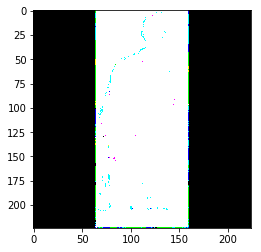

In [233]:
plt.imshow(train_gen[1000][0][0])
# train_gen[0][0][0].shape

In [190]:
images_ge, targets = next(iter(train_gen))

values of self.df.shape[0], self.batch_size,  self.orig_len, len(self.aug_list), delta 8143 32 254 3 1
len :  1016
Index :  0
self.orig_len :  254
Index :  0


In [147]:
images_ge, targets = next(iter(train_gen))

values of self.df.shape[0], self.batch_size,  self.orig_len, len(self.aug_list), delta 8143 32 254 3 0
Index :  253
self.orig_len :  254
Index :  253


In [148]:
len(images_ge)

32